# Correlation Analysis of Asset Price vs Attention

To get a feeling for the correlation between our attention metrics and the asset price development, we perform some basic statistical analysis.

In [91]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## load files

| Ticker | Keyword |
|---|---|
| ALV.DE | Allianz |
| BRK-B | Berkshire Hathaway |
| BTC-USD | Bitcoin |
| DOGE-USD | Dogecoin |
| ETH-USD | Ethereum |
| JPM | JP Morgan |
| MSFT | Microsoft |
| NESN.SW | Nestle |
| NVDA | Nvidia |
| TSLA | Tesla |
| WIX | Wix.com |

In [92]:
asset_ticker = 'WIX'
asset_keyword = 'Wix.com'
data = pd.read_csv(f'data/{asset_ticker}.csv', comment='#')

## Process data

In [93]:
data['relative price increase'] = 100*(data[f'{asset_ticker} (Close)'] -  data[f'{asset_ticker} (Open)'])/ data[f'{asset_ticker} (Open)']

In [94]:
def remove_outliers(data, keys, q = 0.99):
    for key in keys:
        col = data[key]
        q_low = col.quantile(1-q)
        q_high = col.quantile(q)
        data[key] = col.where((col < q_high) & (col > q_low))  
    return data

In [95]:
keys = ['relative price increase', f'Google Trends Score {asset_keyword}', f'{asset_ticker} Trading Volume', 'GDELT Article Volume']
data = remove_outliers(data, keys)

## Analysis

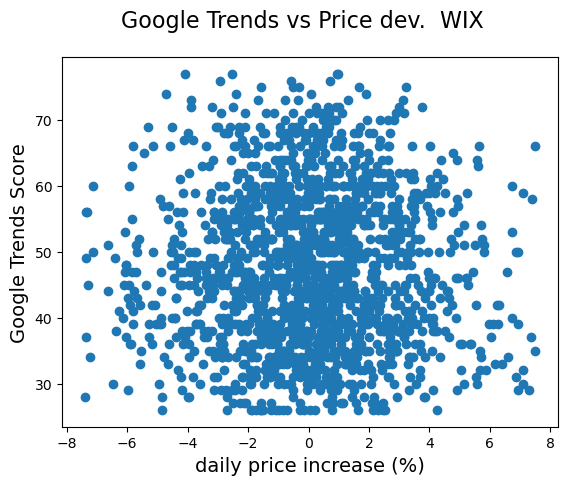

In [96]:
fig, ax = plt.subplots()
fig.suptitle(f'Google Trends vs Price dev.  {asset_ticker}', fontsize=16)
ax.set_xlabel('daily price increase (%)', fontsize=14)
ax.set_ylabel('Google Trends Score', fontsize=14)

ax.scatter(data['relative price increase'], data[f'Google Trends Score {asset_keyword}'])
plt.savefig(f'img/corr/{asset_ticker}_scatter_GT.png')
plt.show()

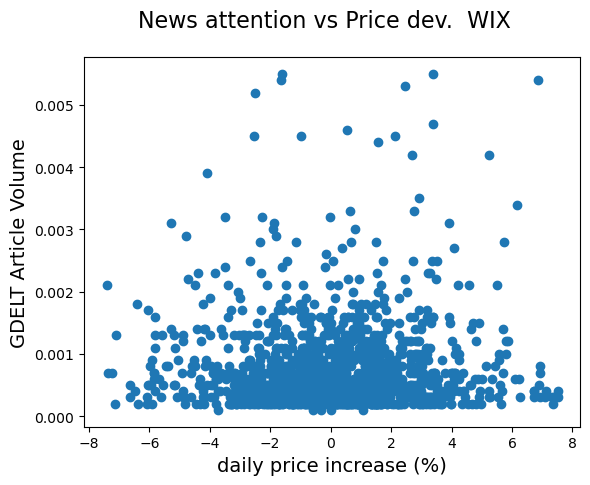

In [97]:
fig, ax = plt.subplots()
fig.suptitle(f'News attention vs Price dev.  {asset_ticker}', fontsize=16)
ax.set_xlabel('daily price increase (%)', fontsize=14)
ax.set_ylabel('GDELT Article Volume', fontsize=14)

ax.scatter(data['relative price increase'], data['GDELT Article Volume'])
plt.savefig(f'img/corr/{asset_ticker}_scatter_GDELT.png')
plt.show()

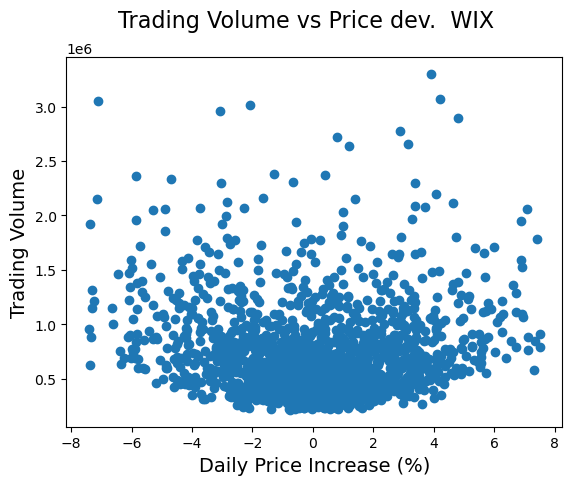

In [98]:
fig, ax = plt.subplots()
fig.suptitle(f'Trading Volume vs Price dev.  {asset_ticker}', fontsize=16)
ax.set_xlabel('Daily Price Increase (%)', fontsize=14)
ax.set_ylabel('Trading Volume', fontsize=14)

ax.scatter(data['relative price increase'], data[f'{asset_ticker} Trading Volume'])
plt.savefig(f'img/corr/{asset_ticker}_scatter_TV.png')
plt.show()

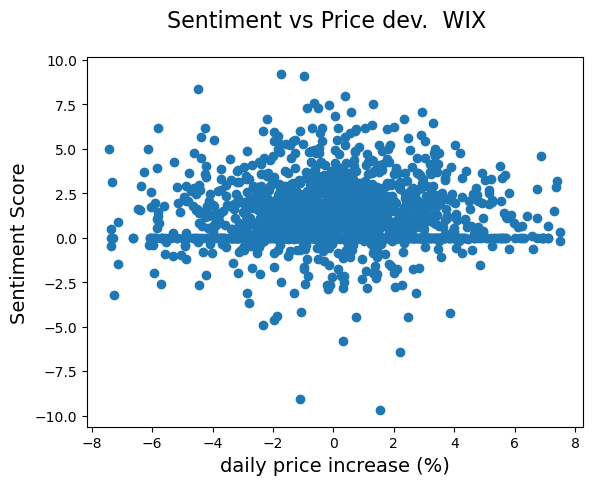

In [99]:
fig, ax = plt.subplots()
fig.suptitle(f'Sentiment vs Price dev.  {asset_ticker}', fontsize=16)
ax.set_xlabel('daily price increase (%)', fontsize=14)
ax.set_ylabel('Sentiment Score', fontsize=14)

ax.scatter(data['relative price increase'][2:], data[f'GDELT Sentiment Score'][:-2])
plt.savefig(f'img/corr/{asset_ticker}_scatter_sent.png')
plt.show()